In [6]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [9]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.
iloc[:, -1], test_size=0.2, random_state=42)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.
shape[1],)),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 0s 13ms/step - loss: 592.5735 - val_loss: 519.9722
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 557.8592 - val_loss: 485.8168
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 516.6907 - val_loss: 443.7037
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 464.9969 - val_loss: 390.3049
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 398.6294 - val_loss: 323.5467
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 320.9223 - val_loss: 249.4340
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 240.0029 - val_loss: 175.1777
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 165.2815 - val_loss: 116.0026
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 112.8310 - val_loss: 77.2352
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss:

In [15]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 12.7247


12.72474193572998

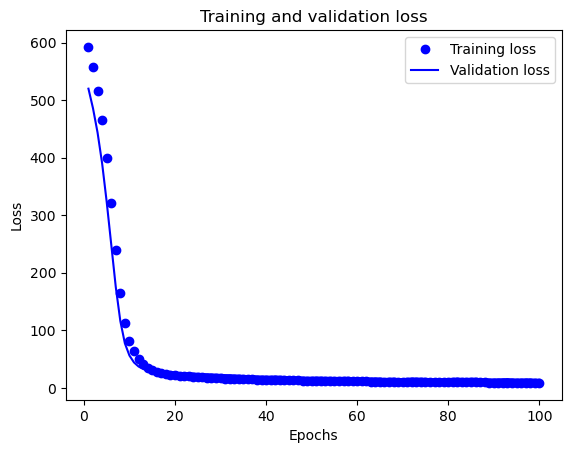

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


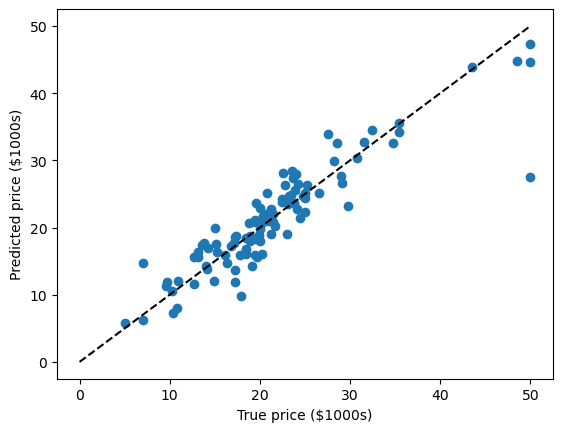

In [17]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()


In [18]:
X_train.shape

(404, 13)

In [19]:
X_train[0]


array([ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
       -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
        0.84534281, -0.07433689,  1.75350503])

In [20]:
custom_input = np.array([[0.2, 0.0, 10.0, 0.0, 0.5, 6.0, 70.0, 3.0, 4.0, 400.0,
17.0, 360.0, 15.0]])
scaled_custom_input = scaler.transform(custom_input)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
custom_prediction = model.predict(scaled_custom_input)
print(f"Custom Input Prediction: {custom_prediction[0][0]}")

Custom Input Prediction: 18.338939666748047
